In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('/content/Housing.csv')

In [41]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [44]:

dummies = pd.get_dummies(data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','price','furnishingstatus']])
dummies = dummies.astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   mainroad_no                      545 non-null    int64
 2   mainroad_yes                     545 non-null    int64
 3   guestroom_no                     545 non-null    int64
 4   guestroom_yes                    545 non-null    int64
 5   basement_no                      545 non-null    int64
 6   basement_yes                     545 non-null    int64
 7   hotwaterheating_no               545 non-null    int64
 8   hotwaterheating_yes              545 non-null    int64
 9   airconditioning_no               545 non-null    int64
 10  airconditioning_yes              545 non-null    int64
 11  prefarea_no                      545 non-null    int64
 12  prefarea_yes                     545 non-null    i

In [45]:
dummies

,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,12250000,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,12250000,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,12215000,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,11410000,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,1767150,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,1750000,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [46]:
dummies.head()

,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,12250000,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,12250000,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,12215000,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,11410000,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [47]:
y = dummies['price']
X_numerical = data.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','price','furnishingstatus'],axis=1)
list_num = X_numerical.columns
list_num


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [48]:
X = pd.concat([X_numerical,dummies[['mainroad_no' ,	'mainroad_yes'	,'guestroom_no',	'guestroom_yes',	'basement_no',	'basement_yes',	'hotwaterheating_no',	'hotwaterheating_yes',	'airconditioning_no',	'airconditioning_yes'	,'prefarea_no','prefarea_yes']]],axis=1) # Removed the extra tab character from 'prefarea_no\t'
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [55]:
print(X.shape)
print(y.shape)

(545, 17)
(545,)


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['area'] = sc.fit_transform(X[['area']])

In [59]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,1.046726,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,1.757010,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,2.218232,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,1.083624,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,1.046726,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
y_Pred = lr.predict(X_test)

In [64]:
print(y_Pred[:3])

[3160903.84777228 4816351.48116412 2448875.15264864]


In [65]:
acc = lr.score(X_test,y_test)
print(acc)

0.6502591366659425


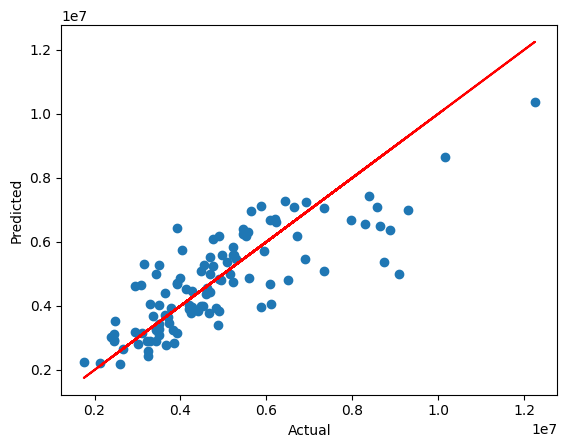

In [66]:
plt.scatter(y_test,y_Pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
k = lr.predict(X_test)
k2 = lr.predict(X_train)

In [68]:
mse_train = mean_squared_error(y_train,k2)
mse_test = mean_squared_error(y_test,k)
r2_train = r2_score(y_train,k2)
r2_test = r2_score(y_test,k)
print(mse_train)
print(mse_test)
print(r2_train)
print(r2_test)
print("------------------------------------------")
print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)
print("Training Set R² Score:", r2_train)
print("Test Set R² Score:", r2_test)
print("------------------------------------------")
# Check for overfitting or underfitting

1122425050357.6643
1241256652842.144
0.6768053599594893
0.6502591366659425
------------------------------------------
Training Set Mean Squared Error: 1122425050357.6643
Test Set Mean Squared Error: 1241256652842.144
Training Set R² Score: 0.6768053599594893
Test Set R² Score: 0.6502591366659425
------------------------------------------


In [69]:
if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train > mse_test and r2_train < r2_test:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Model performs reasonably well but check for slight overfitting.
